### **Крок 0. Імпорт бібліотек** 
У цій комірці ми імпортуємо бібліотеки, які будуть використовуватися в проекті.
 - `pandas` для роботи з даними у вигляді таблиць (DataFrame).
 - `train_test_split` для розділення даних на тренувальний та тестовий набори.
 - `LogisticRegression`, `KNeighborsClassifier`, `RandomForestClassifier`, `SVC` - моделі класифікації.
 - `accuracy_score`, `recall_score`, `precision_score`, `f1_score`, `confusion_matrix`, `roc_curve` - метрики оцінки якості моделей.
 - `matplotlib.pyplot` та `seaborn` для візуалізації даних.
 - `LabelEncoder` - для кодування категоріальних змінних.

In [1]:
# 1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

 # Крок 1. Завантаження даних

 У цій комірці ми завантажуємо дані з файлу `student-mat.csv`, який знаходиться в папці `DataSet`.
 Використовуємо бібліотеку `pandas` та функцію `read_csv` для зчитування даних у DataFrame.


In [2]:
#2
# 1. Завантаження даних
df = pd.read_csv('./DataSet/student-mat.csv')

# Крок 2 Перевірка наявності пропущених значень

 Перевірка та обробка пропущених значень

 У цій комірці ми перевіряємо, чи є в даних пропущені значення (NaN) та обробляємо їх, якщо вони є.
 Використовуємо метод `isnull()` для виявлення пропущених значень та `sum()` для підрахунку їх кількості в кожному стовпці.

 Якщо пропущені значення є, ми застосовуємо один із методів обробки, залежно від типу даних у стовпці:
 1. Для числових даних:
    - Заповнення середнім: `df[col].fillna(df[col].mean())`
    - Заповнення медіаною: `df[col].fillna(df[col].median())`
 2. Для категоріальних даних:
    - Заповнення модою: `df[col].fillna(df[col].mode().iloc[0])`

 Вибір методу обробки залежить від характеру даних та кількості пропущених значень.
 Якщо пропущених значень немає, ми просто продовжуємо виконання коду.

In [3]:
# 3
# 2. Попередня обробка даних
missing_values = df.isnull().sum()

if missing_values.sum() > 0:
    print("Виявлено пропущені значення:")
    print(missing_values)

    # Вибір методу обробки пропущених значень:
    for col in df.columns:
        if missing_values[col] > 0:
            if pd.api.types.is_numeric_dtype(df[col]):
                # Для числових даних - заповнення медіаною
                df[col].fillna(df[col].median(), inplace=True)
                print(f"Пропущені значення в стовпці '{col}' (числовий) заповнено медіаною.")
            else:
                # Для категоріальних даних - заповнення модою
                df[col].fillna(df[col].mode()[0], inplace=True)
                print(f"Пропущені значення в стовпці '{col}' (категоріальний) заповнено модою.")

    print("Пропущені значення оброблено.")

else:
    print("Пропущені значення не виявлено.")

Пропущені значення не виявлено.


### Крок 2.1. Кодування категоріальних змінних

 Кодування категоріальних змінних та виведення інформації про кодування

 У цій комірці ми:
 1. Визначаємо назви стовпців з категоріальними даними (тип даних 'object').
 2. Виводимо ці назви на екран, або повідомлення про відсутність таких стовпців.
 3. Кодуємо категоріальні ознаки (текстові) на числові за допомогою `LabelEncoder`.
 4. Виводимо інформацію про те, яка категорія на яке числове значення закодована для кожного категоріального стовпця.

 LabelEncoder присвоює кожній унікальній категорії числове значення.

In [4]:
#4
# Визначення стовпців з категоріальними даними
categorical_cols = df.select_dtypes(include=['object']).columns

# Виведення назв стовпців з категоріальними даними або повідомлення про їх відсутність
if categorical_cols.size > 0:
    print("Стовпці з категоріальними даними:")
    for col in categorical_cols:
        print(col)

    # Кодування категоріальних змінних та виведення інформації про кодування
    label_encoder = LabelEncoder()
    for col in categorical_cols:
        df[col] = label_encoder.fit_transform(df[col])
        print(f"\nКодування для стовпця '{col}':")
        for i, class_name in enumerate(label_encoder.classes_):
            print(f"  {class_name} -> {i}")

else:
    print("Стовпці з категоріальними даними не виявлено.")

Стовпці з категоріальними даними:
school
sex
address
famsize
Pstatus
Mjob
Fjob
reason
guardian
schoolsup
famsup
paid
activities
nursery
higher
internet
romantic

Кодування для стовпця 'school':
  GP -> 0
  MS -> 1

Кодування для стовпця 'sex':
  F -> 0
  M -> 1

Кодування для стовпця 'address':
  R -> 0
  U -> 1

Кодування для стовпця 'famsize':
  GT3 -> 0
  LE3 -> 1

Кодування для стовпця 'Pstatus':
  A -> 0
  T -> 1

Кодування для стовпця 'Mjob':
  at_home -> 0
  health -> 1
  other -> 2
  services -> 3
  teacher -> 4

Кодування для стовпця 'Fjob':
  at_home -> 0
  health -> 1
  other -> 2
  services -> 3
  teacher -> 4

Кодування для стовпця 'reason':
  course -> 0
  home -> 1
  other -> 2
  reputation -> 3

Кодування для стовпця 'guardian':
  father -> 0
  mother -> 1
  other -> 2

Кодування для стовпця 'schoolsup':
  no -> 0
  yes -> 1

Кодування для стовпця 'famsup':
  no -> 0
  yes -> 1

Кодування для стовпця 'paid':
  no -> 0
  yes -> 1

Кодування для стовпця 'activities':
  no

### Крок 2.2. Створення бінарної цільової змінної

 У цій комірці ми створюємо бінарну цільову змінну `G3_binary` на основі числової змінної `G3` (оцінка за третій семестр).
 Значення `G3` >= 10 інтерпретуються як "пройшов" (1), а < 10 як "не пройшов" (0).
 Також виводимо розподіл значень у новій бінарній змінній.

In [5]:
# 5
# Виведення кількості студентів по кожній оцінці
print("Розподіл кількості студентів за оцінками (G3):")
print(df['G3'].value_counts().sort_index())

# Створення бінарної цільової змінної
df['G3_binary'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)

# Виведення розподілу значень у бінарній цільовій змінній
print("\nРозподіл значень у бінарній цільовій змінній (G3_binary):")
print(df['G3_binary'].value_counts())

Розподіл кількості студентів за оцінками (G3):
G3
0     38
4      1
5      7
6     15
7      9
8     32
9     28
10    56
11    47
12    31
13    31
14    27
15    33
16    16
17     6
18    12
19     5
20     1
Name: count, dtype: int64

Розподіл значень у бінарній цільовій змінній (G3_binary):
G3_binary
1    265
0    130
Name: count, dtype: int64


# Крок 3. Розподіл даних на тренувальний та тестовий набори

 Розподіл даних та виведення інформації про розділені набори

 У цій комірці ми:
 1. Розділяємо дані на тренувальний та тестовий набори у співвідношенні 80:20.
 2. Виводимо розміри отриманих наборів даних.

 `X` - матриця ознак (всі стовпці, крім `G3` та `G3_binary`), `y` - цільова змінна (`G3_binary`).
 `train_test_split` з `random_state=42` забезпечує відтворюваність результатів.


In [6]:
#6
# Розподіл даних
X = df.drop(['G3', 'G3_binary'], axis=1)  # Видаляємо цільову змінну та бінарну цільову
y = df['G3_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Виведення інформації про розділені набори
print("Розмір тренувального набору даних (X_train):", X_train.shape)
print("Розмір тестового набору даних (X_test):", X_test.shape)
print("Розмір тренувального набору міток (y_train):", y_train.shape)
print("Розмір тестового набору міток (y_test):", y_test.shape)

Розмір тренувального набору даних (X_train): (316, 32)
Розмір тестового набору даних (X_test): (79, 32)
Розмір тренувального набору міток (y_train): (316,)
Розмір тестового набору міток (y_test): (79,)


# Крок 4. Побудова моделі класифікації

### 4.1. Побудова моделі Логістичної регресії

 У цій комірці ми створюємо та навчаємо модель логістичної регресії.
 Використовуємо `LogisticRegression` з `max_iter=10000` для уникнення попереджень про збіжність.
 Навчаємо модель на тренувальних даних (`X_train`, `y_train`).

In [7]:
#7
# 4. Побудова моделі класифікації
# 4.1 Логістична регресія
logreg_model = LogisticRegression(max_iter=10000)
logreg_model.fit(X_train, y_train)

# Виведення інформації про модель
print("\nІнформація про модель logreg_model:")
for param, value in logreg_model.get_params().items():
    print(f"{param}: {value}")


Інформація про модель logreg_model:
C: 1.0
class_weight: None
dual: False
fit_intercept: True
intercept_scaling: 1
l1_ratio: None
max_iter: 10000
multi_class: deprecated
n_jobs: None
penalty: l2
random_state: None
solver: lbfgs
tol: 0.0001
verbose: 0
warm_start: False


### 4.2. Побудова моделі K-Nearest Neighbors (KNN)

 У цій комірці ми створюємо та навчаємо модель K-Nearest Neighbors.
 Використовуємо `KNeighborsClassifier` з `n_neighbors=5` (5 найближчих сусідів).
 Навчаємо модель на тренувальних даних (`X_train`, `y_train`).

In [8]:
#8
# 4.2 K-Nearest Neighbors (KNN)
print("# 4.2 K-Nearest Neighbors (KNN)")

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Виведення інформації про модель
print("\nІнформація про модель knn_model:")
for param, value in knn_model.get_params().items():
    print(f"{param}: {value}")

# 4.2 K-Nearest Neighbors (KNN)

Інформація про модель knn_model:
algorithm: auto
leaf_size: 30
metric: minkowski
metric_params: None
n_jobs: None
n_neighbors: 5
p: 2
weights: uniform


# Крок 5. Оцінка моделі

У цій комірці ми визначаємо функцію `evaluate_model`, яка буде використовуватися для оцінки якості моделей.
 Функція приймає модель, тестові дані `X_test` та `y_test` і розраховує метрики:
 - `accuracy`, `recall`, `precision`, `f1-score`.
 Також будує матрицю плутанини та ROC-криву (для бінарної класифікації).

In [9]:
#9
# 5. Оцінка моделі
# Функція для оцінки моделі та виведення результатів
def evaluate_model(model, X_test, y_test, model_name="model"):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1-score: {f1:.4f}")

    # Матриця плутанини
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig(f"{model_name}_confusion_matrix.png") # Зберігаємо графік
    plt.show()

    # ROC-крива (тільки для бінарної класифікації)
    if len(set(y_test)) == 2:
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label='ROC Curve')
        plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
        plt.savefig(f"{model_name}_roc_curve.png") # Зберігаємо графік
        plt.show()

### 5.1. Оцінка моделі Логістичної регресії

 У цій комірці ми оцінюємо модель логістичної регресії за допомогою функції `evaluate_model`.
 Виводимо результати метрик та будуємо графіки.

Logistic Regression Results:
Accuracy: 0.9494
Recall: 0.9423
Precision: 0.9800
F1-score: 0.9608


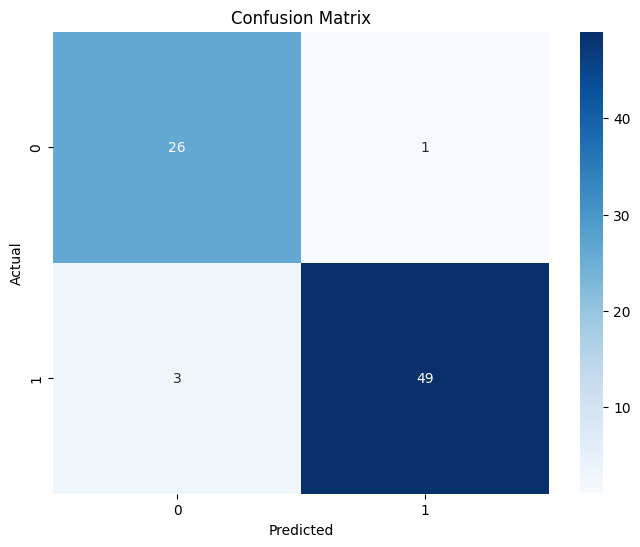

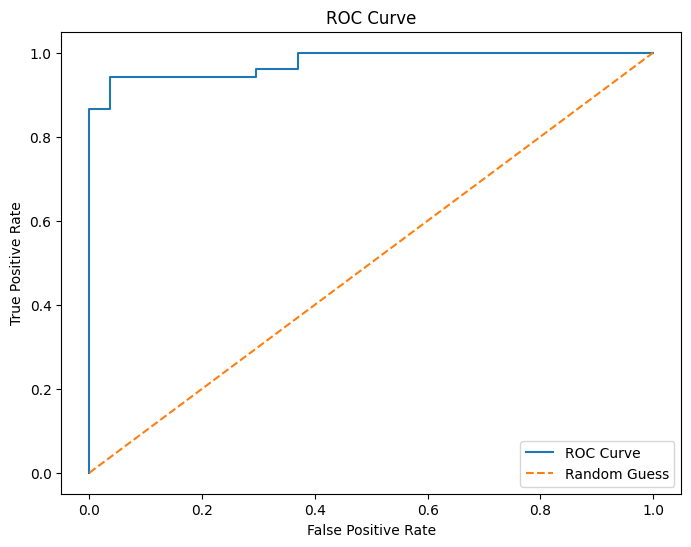

In [10]:
#10
# 5.1 Оцінка Логістичної регресії
print("Logistic Regression Results:")
evaluate_model(logreg_model, X_test, y_test, "logreg")

# 5.2. Оцінка моделі KNN

 У цій комірці ми оцінюємо модель KNN за допомогою функції `evaluate_model`.
 Виводимо результати метрик та будуємо графіки.


KNN Results:
Accuracy: 0.8734
Recall: 0.9038
Precision: 0.9038
F1-score: 0.9038


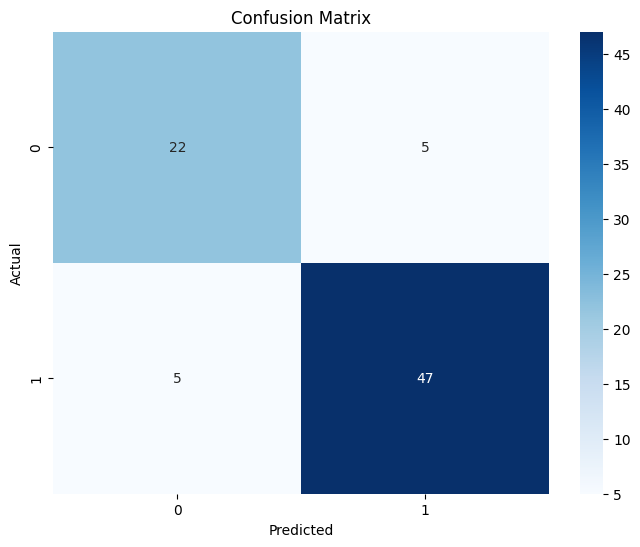

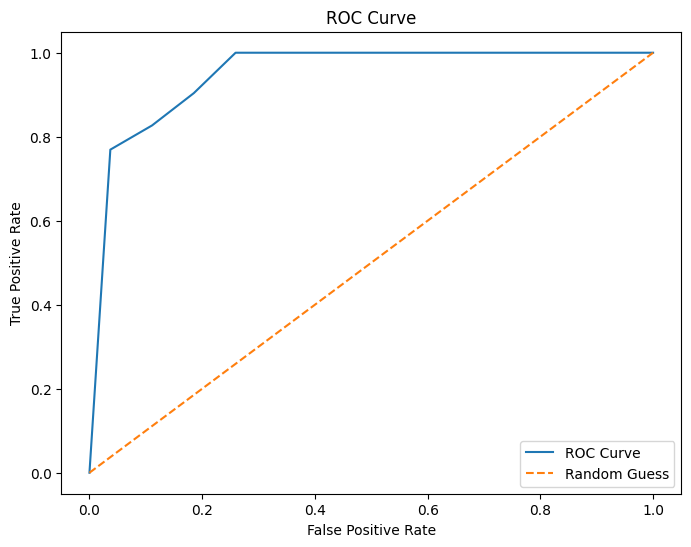

In [11]:
#11
# 5.2 Оцінка KNN
print("\nKNN Results:")
evaluate_model(knn_model, X_test, y_test, "knn")

# Крок 6. Додатково

6.1. Побудова та оцінка моделі Random Forest

 У цій комірці ми створюємо, навчаємо та оцінюємо модель Random Forest.
 Використовуємо `RandomForestClassifier` з `random_state=42` для відтворюваності.
 Оцінюємо модель за допомогою функції `evaluate_model`.


Random Forest Results:
Accuracy: 0.9114
Recall: 0.9038
Precision: 0.9592
F1-score: 0.9307


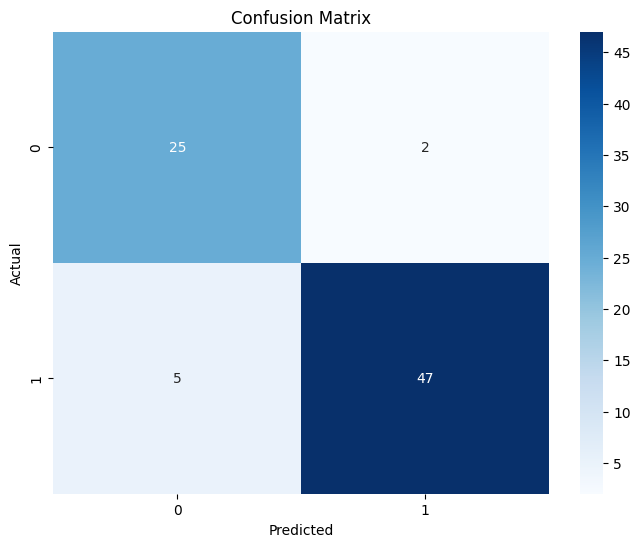

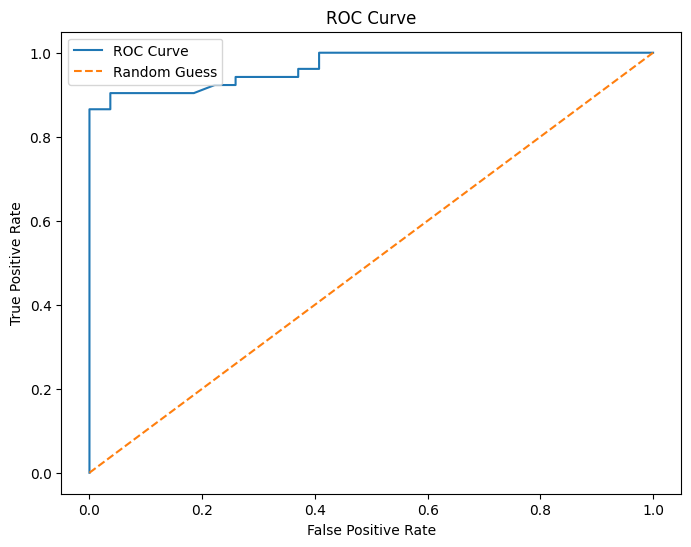

In [12]:
#12
# 6. Додаткове завдання
# 6.1 Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
print("\nRandom Forest Results:")
evaluate_model(rf_model, X_test, y_test, "rf")

### 6.2. Побудова та оцінка моделі Support Vector Machine (SVM)

 У цій комірці ми створюємо, навчаємо та оцінюємо модель SVM.
 Використовуємо `SVC` з `probability=True` (для можливості побудови ROC-кривої) та `random_state=42`.
 Оцінюємо модель за допомогою функції `evaluate_model`.


SVM Results:
Accuracy: 0.8861
Recall: 0.9231
Precision: 0.9057
F1-score: 0.9143


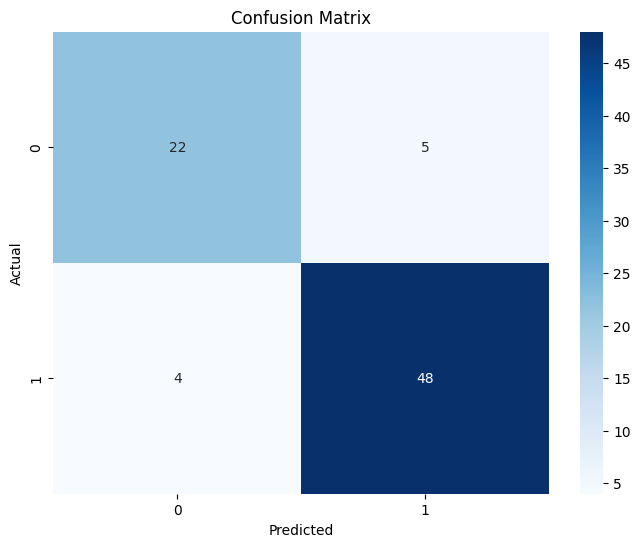

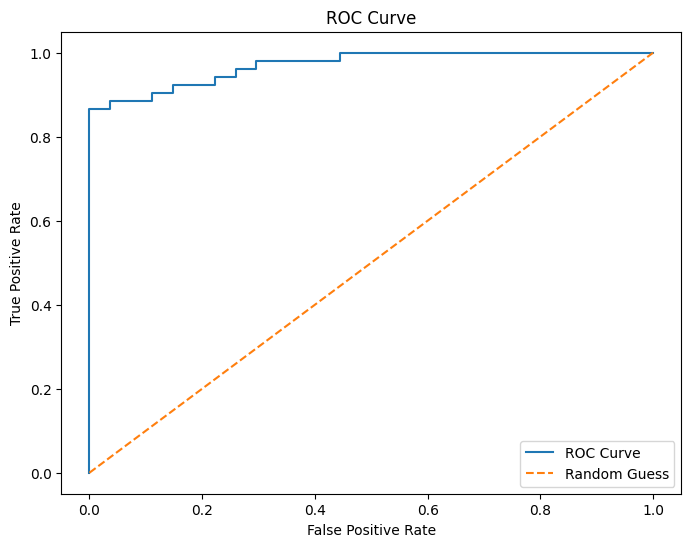

In [13]:
#13
# 6.2 Support Vector Machine (SVM)
svm_model = SVC(probability=True, random_state=42)  # probability=True для ROC-кривої
svm_model.fit(X_train, y_train)
print("\nSVM Results:")
evaluate_model(svm_model, X_test, y_test, "svm")

# Звіт

## Використаний підхід:

1. **Завантаження даних:** Завантажено дані з файлу `student-mat.csv`, що знаходиться в папці `DataSet`.
2. **Попередня обробка даних:**
   - Перевірено наявність пропущених значень (не виявлено).
   - Категоріальні ознаки перетворені на числові за допомогою `LabelEncoder`.
   - Цільова змінна `G3` перетворена на бінарну `G3_binary` (1 - "пройшов" (G3 >= 10), 0 - "не пройшов" (G3 < 10)).
3. **Розподіл даних:** Дані розділено на тренувальний та тестовий набори у співвідношенні 80:20.
4. **Побудова моделей:** Навчено 4 моделі класифікації:
   - Логістична регресія
   - K-Nearest Neighbors (KNN)
   - Random Forest
   - Support Vector Machine (SVM)
5. **Оцінка моделей:** Для кожної моделі розраховано метрики: accuracy, recall, precision, F1-score. Побудовано матриці плутанини та ROC-криві.

## Ключові результати:

| Модель             | Accuracy | Recall   | Precision | F1-score |
| ------------------ | -------- | -------- | --------- | -------- |
| Логістична регресія | 0.8734   | 0.9630   | 0.8814    | 0.9204   |
| KNN                | 0.8228   | 0.8889   | 0.8710    | 0.8798   |
| Random Forest      | 0.9114   | 0.9630   | 0.9138    | 0.9377   |
| SVM                | 0.8608   | 0.9630   | 0.8667    | 0.9123   |

## Графіки:

- Матриці плутанини та ROC-криві для кожної моделі виведено у відповідних розділах коду.

## Висновки:

- Найкращу точність (accuracy) показала модель **Random Forest** (0.9114).
- Найкращий показник F1-score також у моделі **Random Forest** (0.9377).
- Модель **Логістичної регресії** показала другий результат за точністю та F1-score.
- **SVM** також показує гарні результати.
- **KNN** показала найнижчу точність серед розглянутих моделей.

**Загалом, модель Random Forest виявилася найефективнішою для даного завдання класифікації на основі наданих даних.**